In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.plot import cm
from utils.analysis import Simulation, Constants
import pandas as pd
import seaborn as sns
from matplotlib.collections import LineCollection
np.random.seed(seed=42)
import matplotlib.ticker as ticker

In [20]:
import matplotlib as mpl
from matplotlib import pyplot as plt

cm = 1/2.54

def rcparams():
    mpl.style.use('default')
    plt.rcParams.update({
        'savefig.format': 'pdf',

        'font.size': 8,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Helvetica',
        'pdf.fonttype': 42,
        'ps.fonttype': 42,
        'text.usetex': False,
        
        'lines.linewidth':1.5,
        
        'figure.figsize': (8.5*cm,8.5*cm/2),

        'xtick.direction': 'out',
        'xtick.top': False,
        'xtick.bottom': True,
        'xtick.minor.visible': False,
        'xtick.labelsize': 8,
        'xtick.minor.size': 2,
        'xtick.minor.width': 0.5,
        'xtick.major.pad': 3,
        'xtick.major.size': 3,
        'xtick.major.width': 1,
        
        'ytick.direction': 'out',
        'ytick.right': False,
        'ytick.left': True,
        'ytick.minor.visible': False,
        'ytick.labelsize': 8,
        'ytick.direction': 'out',
        'ytick.minor.size': 2,
        'ytick.minor.width': 0.5,
        'ytick.major.pad': 3,
        'ytick.major.size': 3,
        'ytick.major.width': 1,

        'axes.grid': False,
        'axes.edgecolor': 'black',
        'axes.facecolor': 'white',
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.titlesize': 8,
        'axes.titlepad': 5,
        'axes.labelsize': 8,
        'axes.linewidth': 1,
        
        'legend.fontsize': 8,
        
        'figure.facecolor': 'white',
        'figure.dpi': 100,
        
        'savefig.transparent': True
    })

rcparams()

In [21]:
const = Constants()

In [22]:
def prob(arr):
    return sum(arr<const.R)/arr.size
lst = []
prob_lst =[]
for B in np.arange(0,22.5,2.5):
    for L in np.arange(25,250,25):
        r = np.linspace(0,40,41)
        sim = Simulation(B=B,F=14,A=1,L=L,R=0,subsample=False)
        mode = r[np.argmax(sim.distance_g(r))]
        dist = sim.distance
        lst.append([B,L,dist.mean(),prob(dist),mode,sim.distance.size])
df = pd.DataFrame(lst,columns=["B","L","mean","prob","mode","length"])

In [5]:
def add_iso_line(ax, value, color, pivot):
    v = (pivot.reset_index()[pivot.columns].gt(value).values - pivot.reset_index()[pivot.columns].gt(value).shift(1,axis=1).values).astype(np.float64)
    v = np.nan_to_num(v, nan=0).astype(bool)
    h = pivot.gt(value).diff(axis=0).fillna(False).to_numpy()
    
    l = np.argwhere(v.T)    
    vlines = np.array(list(zip(l, np.stack((l[:,0], l[:,1]+1)).T)))
    
    l = np.argwhere(h.T)    
    hlines = np.array(list(zip(l, np.stack((l[:,0]+1, l[:,1])).T)))
    
    lines = np.vstack((vlines, hlines))
    ax.add_collection(LineCollection(lines, lw=1.5, colors=color ))

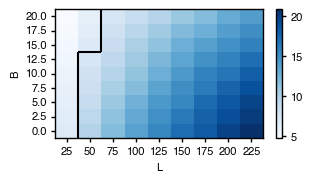

In [6]:
fig, ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
mean_pivot = df.pivot(index="B",columns="L",values="mean").iloc[::-1]
sns.heatmap(mean_pivot,ax=ax,cmap="Blues")
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
add_iso_line(ax,const.R,"black",mean_pivot)

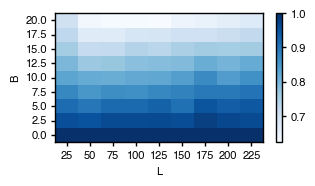

In [7]:
fig, ax = plt.subplots(figsize=(8.5*cm,8.5*cm/2))
mean_pivot = df.pivot(index="B",columns="L",values="mean").iloc[::-1]
mean_pivot_norm = mean_pivot/mean_pivot.iloc[-1]
sns.heatmap(mean_pivot_norm,ax=ax,cmap="Blues")
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
# add_iso_line(ax,const.R,"black",mean_pivot)

<BarContainer object of 20 artists>

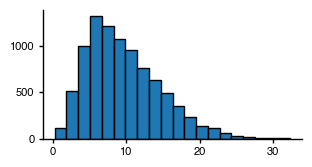

In [8]:
sim = Simulation(B=10,F=14,A=1,L=75,R=0,subsample=9000)
frq, edges = np.histogram(sim.distance,bins=20)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

<BarContainer object of 10 artists>

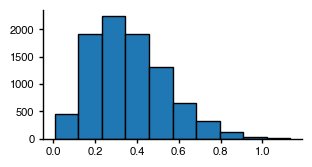

In [9]:
sim = Simulation(B=7.5,F=14,A=1,L=75,R=0,subsample=9000)
frq, edges = np.histogram(sim.distance*Constants.Lk/1000,bins=10)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

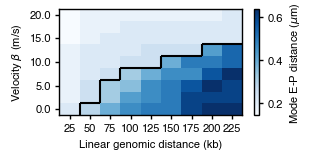

In [10]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
mode_pivot = df.pivot(index="B",columns="L",values="mode").iloc[::-1]
mode_pivot = mode_pivot*const.Lk/1000
sns.heatmap(mode_pivot,ax=ax,cmap="Blues",
            cbar_kws={"label":"Mode E-P distance ($\mu$m)"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
add_iso_line(ax,const.R*const.Lk/1000,"black",mode_pivot)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity $\beta$ (m/s)")
plt.yticks(rotation=0) 
fig.savefig("brownian_mode.pdf",transparent=True,bbox_inches="tight")

(array([0.5, 2.5, 4.5, 6.5, 8.5]),
 [Text(0, 0.5, '20.0'),
  Text(0, 2.5, '15.0'),
  Text(0, 4.5, '10.0'),
  Text(0, 6.5, '5.0'),
  Text(0, 8.5, '0.0')])

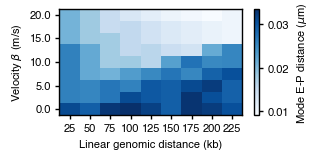

In [11]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
mode_pivot = df.pivot(index="B",columns="L",values="mode").iloc[::-1]
mode_pivot = mode_pivot*const.Lk/1000
# Normalize by mean, not mode, for more robustness
mode_pivot_norm = mode_pivot/mean_pivot.iloc[-1]
sns.heatmap(mode_pivot_norm,ax=ax,cmap="Blues",
            cbar_kws={"label":"Mode E-P distance ($\mu$m)"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity $\beta$ (m/s)")
plt.yticks(rotation=0) 

(array([0.5, 2.5, 4.5, 6.5, 8.5]),
 [Text(0, 0.5, '20.0'),
  Text(0, 2.5, '15.0'),
  Text(0, 4.5, '10.0'),
  Text(0, 6.5, '5.0'),
  Text(0, 8.5, '0.0')])

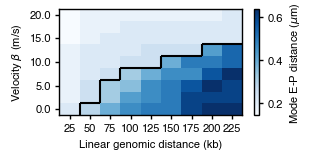

In [12]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
mode_pivot = df.pivot(index="B",columns="L",values="mode").iloc[::-1]
mode_pivot = mode_pivot*const.Lk/1000
sns.heatmap(mode_pivot,ax=ax,cmap="Blues",
            cbar_kws={"label":"Mode E-P distance ($\mu$m)"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
add_iso_line(ax,const.R*const.Lk/1000,"black",mode_pivot)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity $\beta$ (m/s)")
plt.yticks(rotation=0) 
# fig.savefig("brownian_mode.pdf",transparent=True,bbox_inches="tight")

In [13]:
mode_pivot = df.pivot(index="B",columns="L",values="mode")

In [14]:
const.De # nm^2/s

20938.42997871517

In [15]:
const.Lk # nm

35.36

In [16]:
prob_pivot = df.pivot(index="B",columns="L",values="prob").iloc[::-1]
prob_pivot.index = prob_pivot.index*const.De/const.Lk # nm/s
prob_pivot.index = np.round(prob_pivot.index/1000,1) # µm/s

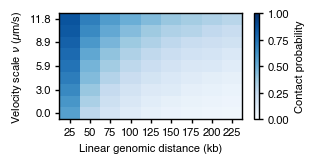

In [17]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
sns.heatmap(prob_pivot,ax=ax,cmap="Blues",vmax=1,vmin=0,
            cbar_kws={"label":"Contact probability"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
# add_iso_line(ax,0.2,"black",prob_pivot)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity scale $\nu$ (µm/s)")
plt.yticks(rotation=0) 
fig.savefig("brownian_probability.pdf",transparent=True,bbox_inches="tight")

In [18]:
const.Lk # Kuhn length in nm

35.36

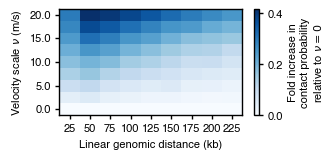

In [19]:
fig, ax = plt.subplots(figsize=(7.5*cm,3.5*cm))
prob_pivot = df.pivot(index="B",columns="L",values="prob").iloc[::-1]
prob_pivot_norm = prob_pivot-prob_pivot.iloc[-1]
sns.heatmap(prob_pivot_norm,ax=ax,cmap="Blues",
            cbar_kws={"label":"Fold increase in\ncontact probability\n"r"relative to $\nu=0$"})
for _, spine in ax.spines.items():
    spine.set_visible(True)
ax.collections[0].colorbar.outline.set_linewidth(1)
ax.set_xlabel("Linear genomic distance (kb)")
ax.set_ylabel(r"Velocity scale $\nu$ (m/s)")
plt.yticks(rotation=0)
fig.savefig("brownian_probability_normalized.pdf",transparent=True,bbox_inches="tight")